In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os
from torchvision import models
from util import load_data, model_train, model_test, TransitionLayer, CombinedModel, metrics_plot, ResNetViT
device = torch.device("cuda")
from hyperparameters import(
        PATH,
        save_path,
        learning_rate,
        batch_size,
        num_epochs,
        image_resize,
        num_each_class,
        val_ratio,
        test_ratio)

In [3]:
# Create DataLoaders if needed
train_loader, val_loader, test_loader = load_data(path=PATH, num=num_each_class, val_ratio=val_ratio, test_ratio=test_ratio, batch_size=batch_size, image_resize=image_resize)

Train size: 7500, Val size: 3000, Test size: 4500
Time for loading data: 103.74s


In [4]:
# ResNet50+swin
name = 'Resnet50+swin_t.path'
name = os.path.join(save_path, name)
model_ResNet = models.resnet50(weights='DEFAULT')
# Remove the avgpool and fully connected layer
model_ResNet = torch.nn.Sequential(*list(model_ResNet.children())[:-2])

model_swin = models.swin_t(weights="DEFAULT")

transition_layer = TransitionLayer()

model = CombinedModel(model_ResNet, model_swin, transition_layer)
num_features = model.model_b.head.in_features
model.head = torch.nn.Linear(num_features, 10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 51810229
Trainable parameters: 51810229


100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


Epoch 1/3
Train Loss: 1.9223, Train Acc: 31.7342
Val Loss: 0.7277, Val Acc: 75.43


100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


Epoch 2/3
Train Loss: 0.3851, Train Acc: 88.8948
Val Loss: 0.1805, Val Acc: 95.35


100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


Epoch 3/3
Train Loss: 0.1473, Train Acc: 96.0021
Val Loss: 0.1253, Val Acc: 97.44
Training time: 381.14s


100%|██████████| 282/282 [00:34<00:00,  8.13it/s]


Test Loss: 0.1323, Test Acc: 97.01


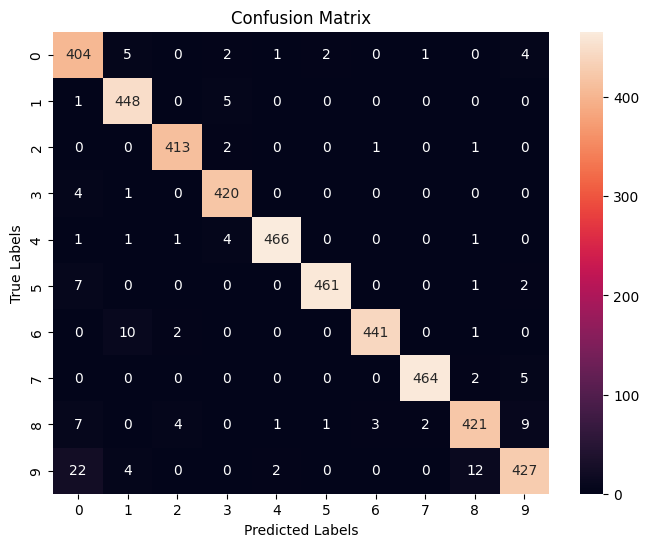

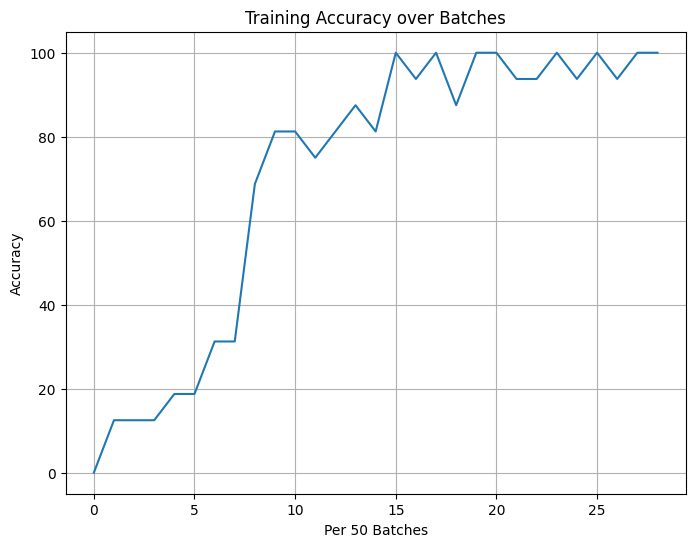

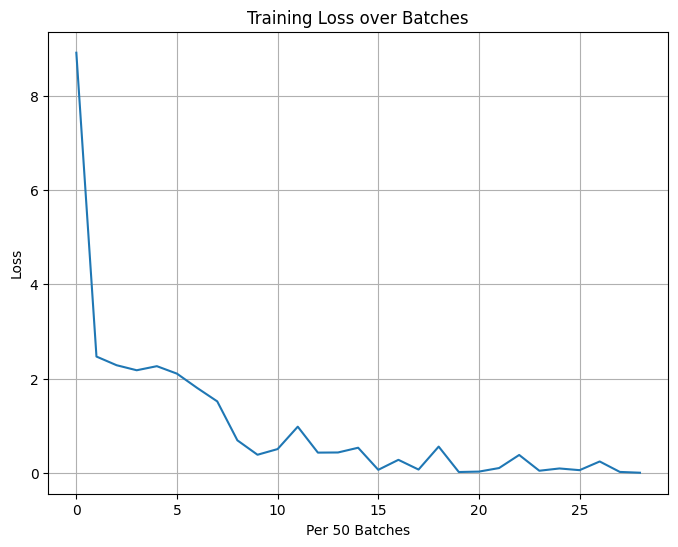

In [5]:
metrics_plot(pred, true, accs, losses, 50)

In [6]:
# ResNet50+swin
name = 'Resnet50+vit.path'
name = os.path.join(save_path, name)

model = ResNetViT(num_classes=10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 50063946
Trainable parameters: 50063946


100%|██████████| 188/188 [00:25<00:00,  7.43it/s]


Epoch 1/3
Train Loss: 0.4590, Train Acc: 85.1635
Val Loss: 0.0950, Val Acc: 97.37


100%|██████████| 188/188 [00:24<00:00,  7.70it/s]


Epoch 2/3
Train Loss: 0.0652, Train Acc: 98.2498
Val Loss: 0.1178, Val Acc: 97.07


100%|██████████| 188/188 [00:24<00:00,  7.75it/s]


Epoch 3/3
Train Loss: 0.0487, Train Acc: 98.7695
Val Loss: 0.1466, Val Acc: 97.51
Training time: 426.48s


100%|██████████| 282/282 [00:36<00:00,  7.75it/s]


Test Loss: 0.1144, Test Acc: 97.81


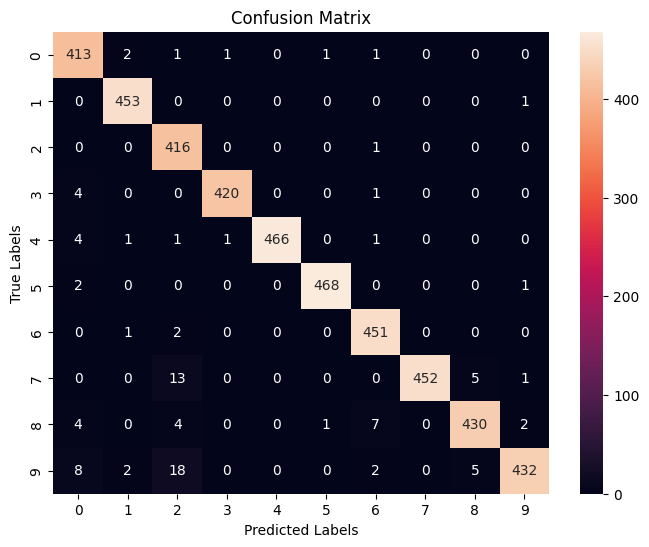

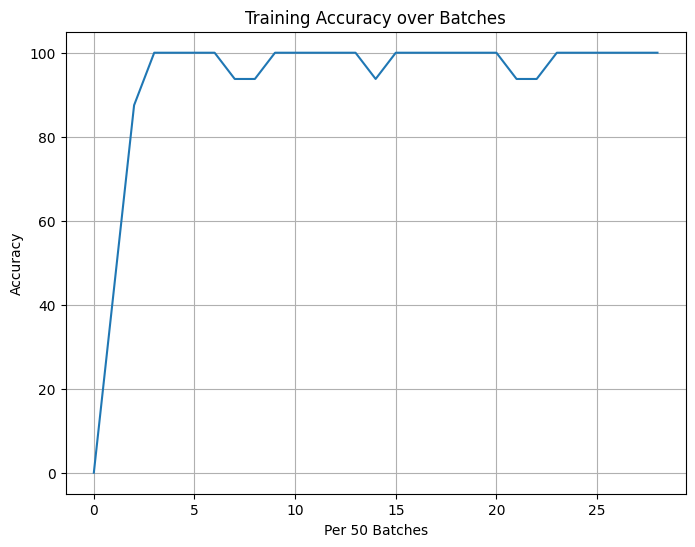

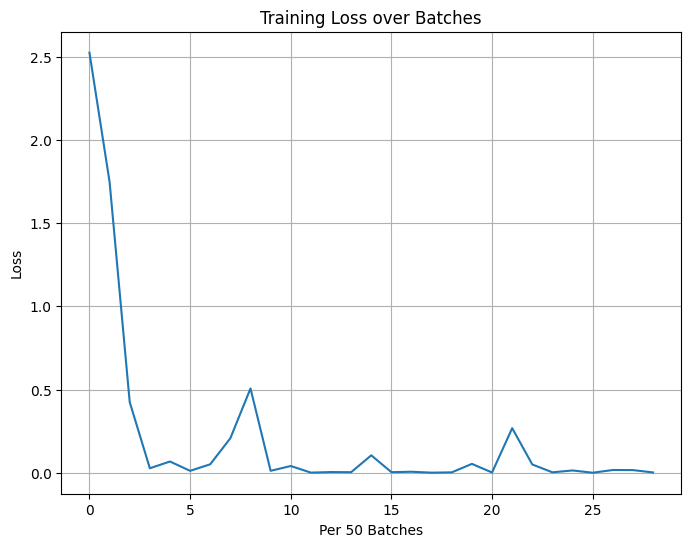

In [7]:
metrics_plot(pred, true, accs, losses, 50)